# Project-1
## Apply
## logistic Regression
## SVM
## Decision Tree
## RandomForest
## on the Loan dataset and check were you will get the best possible accuracy
## project note : Dependent Variable is Loan Status

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset 
loan = pd.read_csv("C:\\Users\\ADMIN\\Downloads\\Datasets\\loan.csv")

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Shape of data
loan.shape

(614, 13)

In [5]:
print(f" Number of rows : {loan.shape[0]} \n Number of columns : {loan.shape[1]} ")

 Number of rows : 614 
 Number of columns : 13 


In [6]:
# information about data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Checking Null values in the data
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Checking percentage of missing values
loan.isnull().sum()*100/len(loan) 

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

## Handling missing values

In [9]:
# features having less than 5% missing values
missing = ["Gender", "Married", "Dependents", "LoanAmount", "Loan_Amount_Term"]


In [10]:
loan = loan.dropna(subset= missing)

In [11]:
loan.isnull().sum()*100/len(loan)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [12]:
loan['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

In [14]:
loan['Self_Employed'].isnull().sum()

0

In [15]:
loan['Credit_History'].unique()

array([ 1.,  0., nan])

In [16]:
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])

In [17]:
loan.isnull().sum()*100/len(loan)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [18]:
# Dropping id column
loan.drop("Loan_ID", axis=1, inplace=True)

# EDA

In [19]:
# Let's visualise loan_amount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

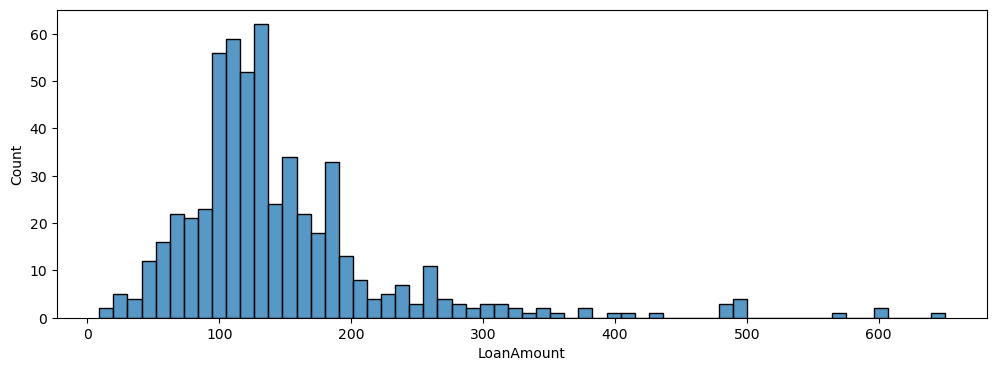

In [20]:
plt.figure(figsize=(12,4))
sns.histplot(loan['LoanAmount'], bins= 60)

In [21]:
# Loan_status

In [22]:
loan['Loan_Status'].value_counts()

Y    389
N    164
Name: Loan_Status, dtype: int64

### loan_status
#### y means loan is paid off : from above value count understood that there are 389 people who paid off the loan amount
#### N means loan is not paid off : 164 people are not return(paid off) loan amount

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

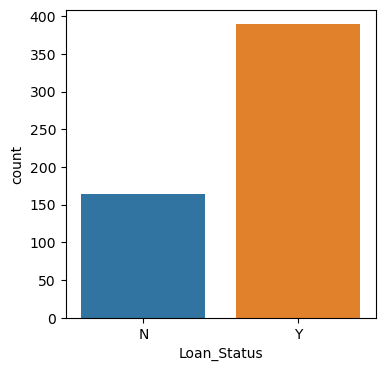

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(x='Loan_Status', data=loan)

In [24]:
# Relation of loan amount with loan status

In [25]:
loan.groupby('Loan_Status')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,164.0,154.060976,89.372021,9.0,100.0,130.5,181.25,570.0
Y,389.0,142.604113,81.586350,17.0,100.0,126.0,160.00,650.0


In [26]:
# Let's see how many graduate and not graduated people paid off the loan amount

<AxesSubplot:xlabel='Education', ylabel='count'>

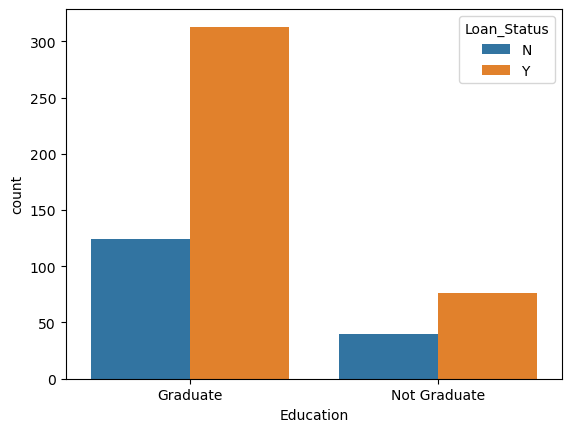

In [27]:
sns.countplot(x='Education', hue='Loan_Status', data=loan)

In [28]:
# Let's observe loan_status with respect to gender column

<AxesSubplot:xlabel='Gender', ylabel='count'>

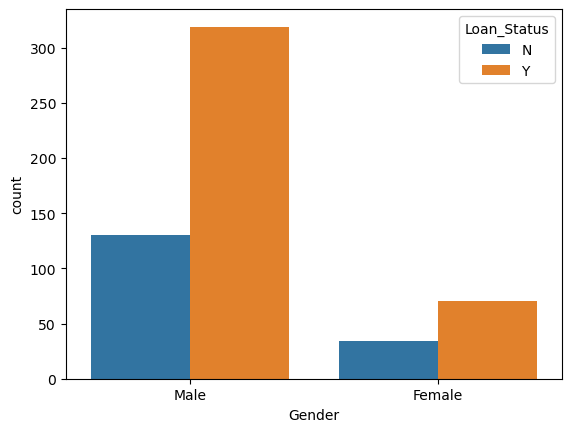

In [29]:
sns.countplot(x='Gender', hue='Loan_Status', data=loan)

In [30]:
loan.groupby('Loan_Status')['Gender'].value_counts()

Loan_Status  Gender
N            Male      130
             Female     34
Y            Male      319
             Female     70
Name: Gender, dtype: int64

## Label encoding using get dummy method

In [31]:
# categorical features
category = [x for x in loan if loan[x].dtypes == 'object']
category

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [32]:
loan = pd.get_dummies(loan, drop_first=True)

In [33]:
loan.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1


In [34]:
loan.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

## Correlation

In [35]:
corr_matrix = loan.corr()

In [36]:
# Finding correlation with respect to loan_status column
loan.corr()['Loan_Status_Y'].sort_values(ascending=False)

Loan_Status_Y              1.000000
Credit_History             0.508250
Property_Area_Semiurban    0.128010
Married_Yes                0.103425
Dependents_2               0.078084
Gender_Male                0.031990
Loan_Amount_Term          -0.017117
Dependents_3+             -0.023960
Property_Area_Urban       -0.026400
ApplicantIncome           -0.028482
Self_Employed_Yes         -0.031146
Education_Not Graduate    -0.054442
Dependents_1              -0.057803
LoanAmount                -0.062313
CoapplicantIncome         -0.073415
Name: Loan_Status_Y, dtype: float64

<AxesSubplot:>

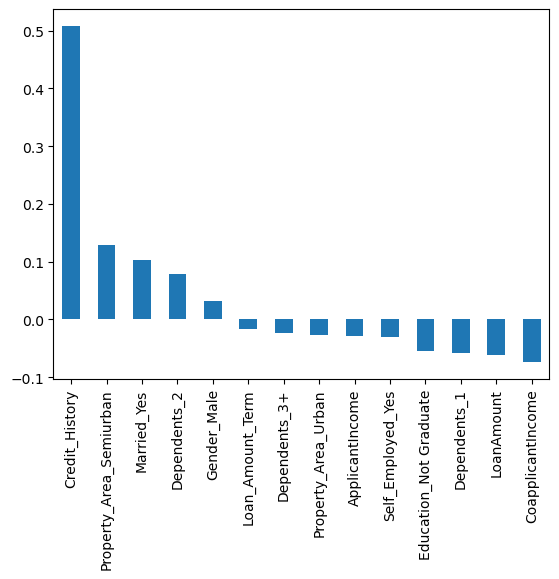

In [37]:
loan.corr()['Loan_Status_Y'].sort_values(ascending=False).drop('Loan_Status_Y').plot(kind='bar')

### From the above graph we observed that 'Credit_history' column is highly correlated with target variable i.e Loan_status

<AxesSubplot:>

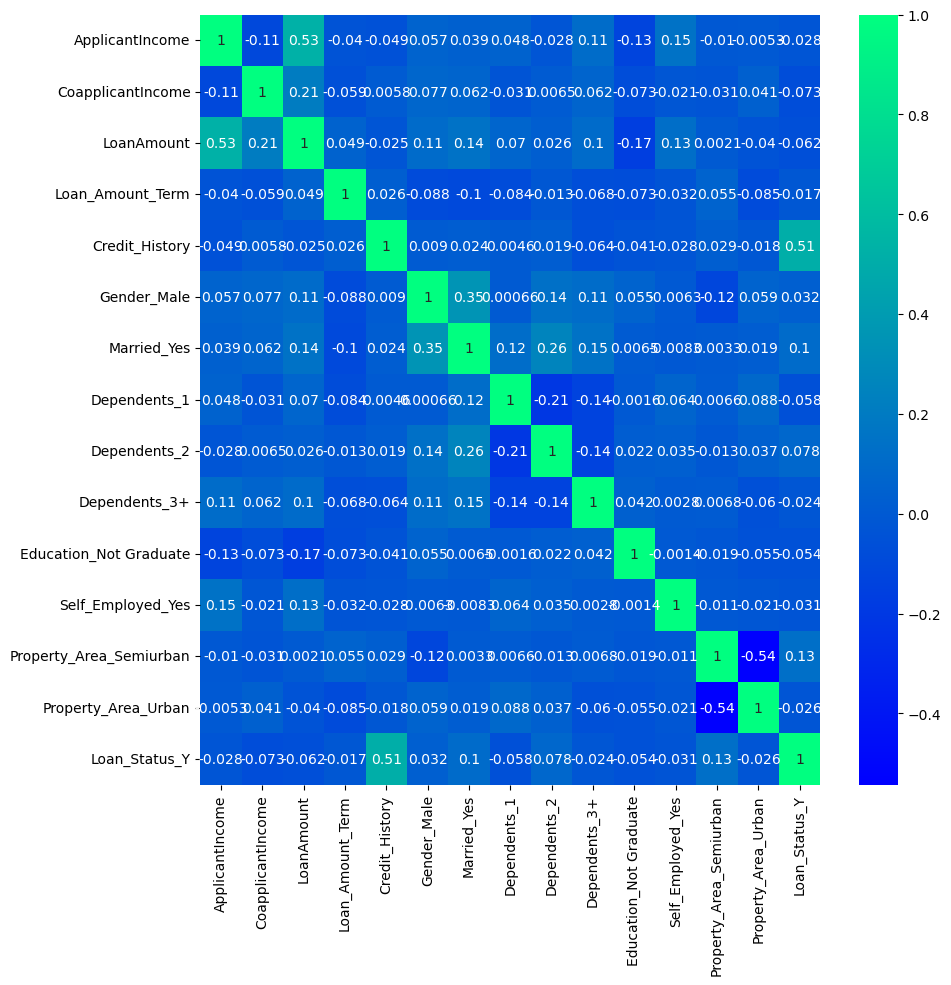

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='winter')

## There is not any highly correlated feature in correlation heatmap

## Feature scaling

In [40]:
ind = loan.drop('Loan_Status_Y', axis=1)
dep = loan['Loan_Status_Y'].values


In [41]:
# Standard scaler
scaler = StandardScaler()
ind = scaler.fit_transform(ind)

In [42]:
ind

array([[-0.1286936 , -0.0496989 , -0.21436848, ..., -0.38689553,
        -0.79755544, -0.68041382],
       [-0.39429616, -0.54563811, -0.95267463, ...,  2.58467707,
        -0.79755544,  1.46969385],
       [-0.46426221,  0.22984244, -0.30963379, ..., -0.38689553,
        -0.79755544,  1.46969385],
       ...,
       [ 0.45670585, -0.4667088 ,  1.27415198, ..., -0.38689553,
        -0.79755544,  1.46969385],
       [ 0.37465933, -0.54563811,  0.48821318, ..., -0.38689553,
        -0.79755544,  1.46969385],
       [-0.1286936 , -0.54563811, -0.15482766, ...,  2.58467707,
         1.25383134, -0.68041382]])

## Splitting data into train and test and training model with various algorithms


In [43]:
# Creating a function which train the model

def model_train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.2, random_state=300)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    
    print(f"Accuracy Report of {model} is \n :: {classification_report(y_test, y_hat)}\n")
    print(f"{model} Accuracy Score Before Hyperparameter tuning is :: {accuracy_score(y_test, y_hat)*100:.2f}%\n")

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
model_train(Log_reg, ind, dep)


Accuracy Report of LogisticRegression() is 
 ::               precision    recall  f1-score   support

           0       0.88      0.44      0.58        32
           1       0.81      0.97      0.89        79

    accuracy                           0.82       111
   macro avg       0.84      0.71      0.73       111
weighted avg       0.83      0.82      0.80       111


LogisticRegression() Accuracy Score Before Hyperparameter tuning is :: 81.98%



## Logistic Regression with Hyper parameter tuning

In [46]:
solver = ['liblinear','lbfgs','newton-cg','sag','saga']

best_solver = '' 
best_accuracy=0

for random in range(11,301):
    X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.2, random_state=random)
    
    for sol in solver:
        log = LogisticRegression(solver=sol, C=0.01)
        log.fit(X_train, y_train)
        y_pred= log.predict(X_test)
        
        accuracy = round(accuracy_score(y_test, y_pred)*100, 2)
        
        if accuracy > best_accuracy:
            best_accuracy=accuracy
            best_solver = sol
            
print(f"\n Best Solver for logistic Regression model is  : {best_solver}\n")
print(f"Best score of LogisticRegression using {best_solver} solver :: {best_accuracy} % \n ")


 Best Solver for logistic Regression model is  : liblinear

Best score of LogisticRegression using liblinear solver :: 92.79 % 
 


## Best accuracy for logistic regression model is 92.79%

## SVM

In [47]:
from sklearn.svm import SVC
clf = SVC()
model_train(clf, ind, dep)

Accuracy Report of SVC() is 
 ::               precision    recall  f1-score   support

           0       0.93      0.44      0.60        32
           1       0.81      0.99      0.89        79

    accuracy                           0.83       111
   macro avg       0.87      0.71      0.74       111
weighted avg       0.85      0.83      0.81       111


SVC() Accuracy Score Before Hyperparameter tuning is :: 82.88%



## SVM with Hyperparameter tuning

In [49]:
kernel =  ['rbf', 'linear', 'poly','sigmoid'] 

best_kernel = '' 
best_accuracy=0

for random in range(11,301):
    X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.2, random_state=random)
    
    for ker in kernel:
        clf = SVC(kernel=ker, C=0.1)
        clf.fit(X_train, y_train)
        y_pred1= clf.predict(X_test)
        
        accuracy = round(accuracy_score(y_test, y_pred1)*100, 2)
        
        if accuracy > best_accuracy:
            best_accuracy=accuracy
            best_kernel = ker
            
print(f"\n Best kernel for SVM model is  : {best_kernel}\n")
print(f"Best score of SVM model using {best_kernel} kernel :: {best_accuracy} % \n ")



 Best kernel for SVM model is  : linear

Best score of SVM model using linear kernel :: 92.79 % 
 


## Best accuracy for SVM model is 92.79%


## Decision Tree 

In [50]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier()
model_train(DC,ind,dep)

Accuracy Report of DecisionTreeClassifier() is 
 ::               precision    recall  f1-score   support

           0       0.48      0.50      0.49        32
           1       0.79      0.78      0.79        79

    accuracy                           0.70       111
   macro avg       0.64      0.64      0.64       111
weighted avg       0.71      0.70      0.70       111


DecisionTreeClassifier() Accuracy Score Before Hyperparameter tuning is :: 70.27%



## Decision Tree with Hyperparameter tuning

In [51]:
dec_grid = {
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]
           }

tuned_tree = RandomizedSearchCV(estimator=DC,param_distributions= dec_grid,cv=4, 
                                n_jobs=-1, verbose=1, scoring = "accuracy" )
tuned_tree.fit(X_train, y_train)

print(f"\n Best Hyperparameter for DecisionTreeClassifier model :: {tuned_tree.best_params_}\n")
print(f" Best Score of DecisionTreeClassifier model after Hyperparameter tuning :: {(tuned_tree.best_score_)*100:.2f}% \n")

Fitting 4 folds for each of 10 candidates, totalling 40 fits

 Best Hyperparameter for DecisionTreeClassifier model :: {'min_samples_leaf': 20, 'max_depth': 3, 'criterion': 'gini'}

 Best Score of DecisionTreeClassifier model after Hyperparameter tuning :: 80.32% 



## Best accuracy for Decision Tree model is 80.32%


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_train(rf, ind, dep)

Accuracy Report of RandomForestClassifier() is 
 ::               precision    recall  f1-score   support

           0       0.76      0.50      0.60        32
           1       0.82      0.94      0.88        79

    accuracy                           0.81       111
   macro avg       0.79      0.72      0.74       111
weighted avg       0.80      0.81      0.80       111


RandomForestClassifier() Accuracy Score Before Hyperparameter tuning is :: 81.08%



## Random Forest with hyperparameter tuning


In [53]:
random_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes': [3, 6, 9]
    }

rf_tuned = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,n_jobs=-1, cv=3, verbose=1 )
rf_tuned.fit(X_train, y_train)

print(f"\n Best Hyperparameter for RandomForestClassifier model :: {rf_tuned.best_params_} \n")
print(f" Best Score of RandomForestClassifier model after Hyperparameter tuning :: {(rf_tuned.best_score_)*100:.2f}%")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

 Best Hyperparameter for RandomForestClassifier model :: {'n_estimators': 50, 'max_leaf_nodes': 9, 'max_features': None, 'max_depth': 9} 

 Best Score of RandomForestClassifier model after Hyperparameter tuning :: 80.99%


## Best accuracy for random forest model is 80.99%
